##Loan Prediction data AutoML

### Name: Prarthana Ganesh Shetty
### NUID: 002833314

####Abstract
The main aim is to find which all variables are making most sense. And to evaluate the accuracy of the model using H2O Auto ML. Another aim is to find which all features has high multi-collienarity.

####Data Set
The dataset encompasses a range of attributes pertinent to loans and borrowers, designed to facilitate the prediction of loan approval or rejection. It includes information such as loan identification numbers, the number of dependents associated with each borrower, educational levels, self-employment status, annual income, loan amounts, loan terms, credit scores, and various asset values possessed by borrowers. Notably, the dataset also includes a crucial feature denoting the loan status, with values Approved and Rejected, indicating whether their loans were approved or rejected. With a focus on predicting loan outcomes, this dataset provides a comprehensive array of borrower and loan characteristics essential for predictive modeling and risk assessment within lending institutions.



####Variable Description
The dataset contains information about loans and borrowers, with a total of 13 attributes:

loan_id: Identification number for each loan (numerical)

no_of_dependents: Number of dependents of the borrower (numerical)

education: Level of education of the borrower (categorical)

self_employed: Indicates whether the borrower is self-em
ployed or not (categorical)

income_annum: Annual income of the borrower (numerical).
loan_amount: Amount of the loan (numerical)

loan_term: Term of the loan (numerical)

cibil_score: Credit score of the borrower (numerical)

residential_assets_value: Value of residential assets owned by the borrower (numerical)

commercial_assets_value: Value of commercial assets owned by the borrower (numerical)

luxury_assets_value: Value of luxury assets owned by the borrower (numerical).
bank_asset_value: Value of assets held in bank accounts by the borrower (numerical)

loan_status: Status of the loan, Approved or Rejected



In [94]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2on
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [95]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [96]:
# Setting a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [97]:
# Using 50% of availible resources to determine the minimum amount of memory required based on a specified percentage of available virtual memory.
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [98]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:7817..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8ui233v5
  JVM stdout: /tmp/tmp8ui233v5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8ui233v5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:7817
Connecting to H2O server at http://127.0.0.1:7817 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_nnp5fy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [99]:
url = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [100]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv")


In [101]:
df

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,Graduate,No,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,Approved
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
9,0,Graduate,Yes,800000,2.2e+06,20,782,1.3e+06,800000,2.8e+06,600000,Approved
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected


##**ANALYSING THE DATASET**


In [102]:
df.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,Graduate,No,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,Approved
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
9,0,Graduate,Yes,800000,2.2e+06,20,782,1.3e+06,800000,2.8e+06,600000,Approved
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected


In [103]:
df.describe()

Rows:4269
Cols:13

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
type,int,int,enum,enum,int,int,int,int,int,int,int,int,enum
mins,1.0,0.0,,,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0,
mean,2135.0,2.4987116420707434,,,5059123.916608106,15133450.45678145,10.900445069102831,599.9360505973295,7472616.537830873,4973155.3056922015,15126305.926446477,4976692.433825252,
maxs,4269.0,5.0,,,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0,
sigma,1232.4984787008866,1.6959101607111242,,,2806839.8318184614,9043362.984842857,5.709187279245264,172.43040073575875,6503636.587664096,4388966.089638461,9103753.665256493,3250185.3056957023,
zeros,0,712,,,0,0,0,0,45,107,0,8,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected


#### loan_id:
The loan_id ranges from 1 to 4269, indicating unique identifiers for each loan application.
No specific inferences can be made about outliers or trends based on loan_id.

#### no_of_dependents:
The variable 'no_of_dependents' has a range from 0 to 5.
The mean is approximately 2.5, indicating an average number of dependents.
There are no negative values, suggesting valid data.
Most loans have a low to moderate number of dependents based on the 25th, 50th (median), and 75th percentiles.

#### income_annum:
The income_annum ranges from 200,000 to 9,700,000.
The mean income_annum is around 5,059,124.
The distribution of income_annum seems wide, with a large standard deviation.
Most incomes fall within the interquartile range (25th to 75th percentiles).

#### loan_amount:
The loan_amount ranges from 300,000 to 39,200,000.
The mean loan_amount is approximately 15,133,450.
The distribution of loan_amount also appears wide, with a large standard deviation.
Most loan amounts fall within the interquartile range.

#### loan_term:
Loan terms range from 2 to 20 years, with an average of around 10.9 years.
Most loans have terms between 6 and 16 years, based on percentiles.

#### cibil_score:
CIBIL scores range from 300 to 900.
The mean cibil_score is around 599.94.
The distribution of cibil_score seems to be centered around the mean.

#### residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value:
The values for these assets range from negative to positive.
It's unusual to have negative values for assets; further investigation is needed to understand this.

#### loan_status:
Loan_status is categorical, indicating whether a loan is approved or denied.
There are two unique values: 0 and 1, possibly denoting binary categories.

In [104]:
# resulting df_train contains 80%, while the df_test contains the remaining 20%.
pct_rows=0.80

# split the DataFrame into df_train and df_test
df_train, df_test = df.split_frame([pct_rows])

In [105]:
print(df_train.shape)
print(df_test.shape)

(3441, 13)
(828, 13)


In [106]:
df_train.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected
11,4,Graduate,Yes,2.9e+06,1.12e+07,2,547,8.1e+06,4.7e+06,9.5e+06,3.1e+06,Approved
12,2,Not Graduate,Yes,6.7e+06,2.27e+07,18,538,1.53e+07,5.8e+06,2.04e+07,6.4e+06,Rejected


In [107]:
# obtaining the column names
X=df.columns
print(X)

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [108]:
# Setting target and predictor variables
y = "loan_status"
X.remove(y)

  # Removing the result frm our predictors data
print(X)

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [109]:
print(y)

loan_status


In [110]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


In [111]:
aml.train(x=X, y=y, training_frame=df_train)
#train method fits and trains the H2OAutoML instance on the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [112]:
print(aml.leaderboard) # displaying the performance metrics of the models generated by the H2OAutoML process

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_41151  0.99813   0.0488576  0.997481               0.0197232  0.115481  0.0133358
StackedEnsemble_AllModels_3_AutoML_1_20240220_41151     0.998051  0.0481068  0.997525               0.0197736  0.114443  0.0130972
StackedEnsemble_AllModels_1_AutoML_1_20240220_41151     0.998039  0.0488725  0.997412               0.0181497  0.11566   0.0133772
StackedEnsemble_AllModels_2_AutoML_1_20240220_41151     0.998038  0.0484506  0.997477               0.0206319  0.114918  0.0132062
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_41151  0.997982  0.0492663  0.997446               0.0215748  0.117148  0.0137236
GBM_3_AutoML_1_20240220_41151                           0.997953  0.0490511  0.997382               0.0211537  0.115746  0.0133972
GBM_1_AutoML_1_20240220_41151                           0.997944  0.0515372  0.9972

In [113]:
#dictionary object maps each model ID to an index in the leaderboard.
#referencing the index of the top-performing model(s) when making predictions

model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_41151': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20240220_41151': 1,
 'StackedEnsemble_AllModels_1_AutoML_1_20240220_41151': 2,
 'StackedEnsemble_AllModels_2_AutoML_1_20240220_41151': 3,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_41151': 4,
 'GBM_3_AutoML_1_20240220_41151': 5,
 'GLM_1_AutoML_1_20240220_41151': 23}

In [114]:
print(model_index)


5


In [115]:
# retrieving the best model from the leaderboard
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

In [116]:
# returns the algorithm used by the best model.

best_model.algo

'gbm'

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

In [118]:
# RMSE is calculated on the training set
print(best_model.rmse(train = True))

0.010377598796724445


In [119]:

# RMSE score calculated on the test set
print(best_model.rmse(train = False))


0.010377598796724445


In [120]:
#retrieve multiple performance metrics for machine learning models

def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

In [121]:
#calculating performance metrics on a test dataset
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)

#performance metrics for the model on the test dataset
stats_test

{'mse': 0.015730347528618797,
 'rmse': 0.1254206822203531,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.061092574281693963,
 'auc': 0.9979585978118721,
 'gini': 0.9959171956237443}

In [122]:
# predictions on a test dataset df_test using the best model.


predictions = best_model.predict(df_test)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [123]:
# calculate the performance metrics of the best model on the training dataset.

best_model.model_performance(train=True)

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00010769455678577665
RMSE: 0.010377598796724445
LogLoss: 0.003277321236807217
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.857651365840525
          Approved    Rejected    Error    Rate
--------  ----------  ----------  -------  ------------
Approved  2121        0           0        (0.0/2121.0)
Rejected  0           1320        0        (0.0/1320.0)
Total     2121        1320        0        (0.0/3441.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.857651     1         189
max f2                       0.857651     1         189
max f0point5                 0.857651     1         189
max accuracy                 0.857651     1         189
max precision                0.999858     1         0
max recall                   0.857651     1         189
max specificity              0.999858     1         0
max absolute_mcc             0.857651     1         189
max min_per_class_accuracy   0.857651     1         189
max mean_per_class_accuracy  0.857651     1         189
max tns                      0.999858     2121      0
max fns                      0.999858     1319      0
max fps                      6.42585e-05  2121      399
max tps                      0.857651     1320      189
max tnr                      0.999858     1         0
max fnr                      0.999858     0.999242  0
max fpr                      6.42585e-05  1         399
max tpr                      0.857651     1         189

Gains/Lift Table: Avg response rate: 38.36 %, avg score: 38.36 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0101715                   0.99948            2.60682  2.60682            1                0.999552     1                           0.999552            0.0265152       0.0265152                  160.682  160.682            0.0265152
2        0.0200523                   0.99941            2.60682  2.60682            1                0.999447     1                           0.9995              0.0257576       0.0522727                  160.682  160.682            0.0522727
3        0.0302238                   0.99937            2.60682  2.60682            1                0.999392     1                           0.999464            0.0265152       0.0787879                  160.682  160.682            0.0787879
4        0.0401046                   0.999332           2.60682  2.60682            1                0.999349     1                           0.999436            0.0257576       0.104545                   160.682  160.682            0.104545
5        0.0502761                   0.999297           2.60682  2.60682            1                0.999314     1                           0.999411            0.0265152       0.131061                   160.682  160.682            0.131061
6        0.100262                    0.999178           2.60682  2.60682            1                0.999238     1                           0.999325            0.130303        0.261364                   160.682  160.682            0.261364
7        0.150247                    0.99904            2.60682  2.60682            1                0.999113     1                           0.999254            0.130303        0.391667                   160.682  160.682            0.391667
8        0.200

In [124]:
#convert the predictions into oandas dataframe
y_pred=h2o.as_list(predictions)

#first 100 rows of the DataFrame.
y_pred[0:100]

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,predict,Approved,Rejected
0,Approved,0.999131,0.000869
1,Approved,0.999739,0.000261
2,Rejected,0.001078,0.998922
3,Approved,0.999687,0.000313
4,Rejected,0.001109,0.998891
...,...,...,...
95,Rejected,0.002526,0.997474
96,Rejected,0.001901,0.998099
97,Approved,0.999450,0.000550
98,Approved,0.999608,0.000392


In [125]:
#convert the response variable y in the test dataset into a Pandas DataFrame
y_test=h2o.as_list(df_test[y])
y_test[0:100]

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,loan_status
0,Approved
1,Approved
2,Rejected
3,Approved
4,Rejected
...,...
95,Rejected
96,Rejected
97,Approved
98,Approved


In [126]:
print(X)


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_3_AutoML_1_20240220_41151 on column 'no_of_dependents'.
no_of_dependents    mean_response    stddev_response    std_error_mean_response
------------------  ---------------  -----------------  -------------------------
0                   0.373971         0.477611           0.0073099
1                   0.374858         0.478052           0.00731665
2                   0.37787          0.479103           0.00733272
3                   0.377297         0.479025           0.00733154
4                   0.377393         0.479035           0.0073317
5                   0.378968         0.478877           0.00732928]

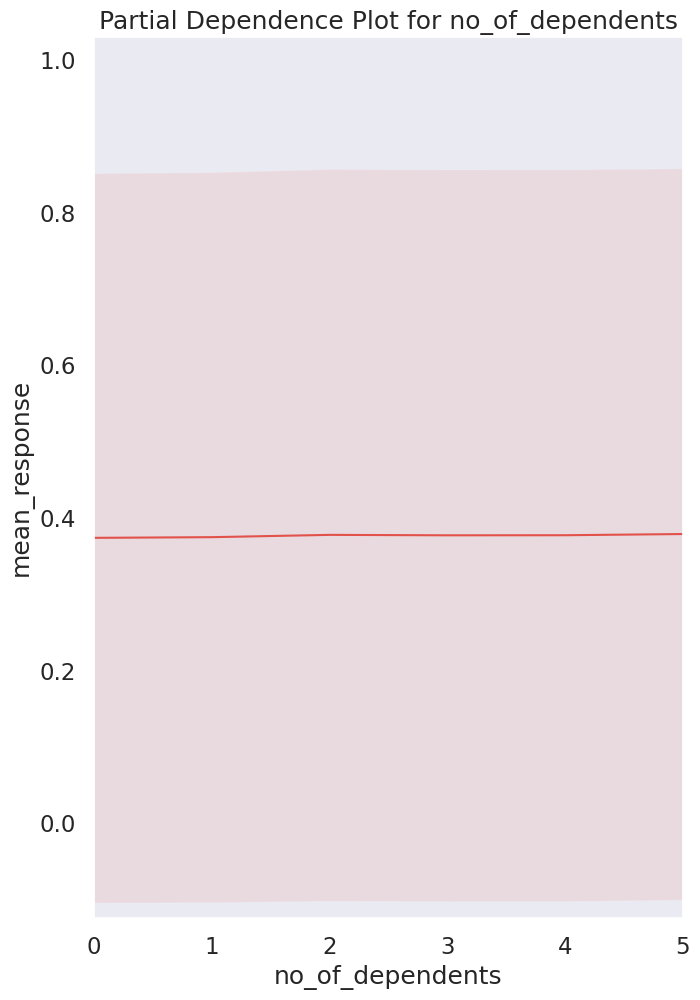

In [127]:
#generates partial dependence plots for the feature column
best_model.partial_plot(df, cols=['no_of_dependents'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_3_AutoML_1_20240220_41151 on column 'loan_amount'.
loan_amount    mean_response    stddev_response    std_error_mean_response
-------------  ---------------  -----------------  -------------------------
300000         0.409808         0.487333           0.0074587
2.36316e+06    0.406204         0.486604           0.00744754
4.42632e+06    0.405098         0.486334           0.0074434
6.48947e+06    0.405137         0.486221           0.00744167
8.55263e+06    0.400995         0.484048           0.00740842
1.06158e+07    0.391954         0.482073           0.00737819
1.26789e+07    0.391546         0.481743           0.00737314
1.47421e+07    0.385118         0.479538           0.00733939
1.68053e+07    0.376698         0.47722            0.0073039
1.88684e+07    0.371117         0.475062           0.00727088
2.09316e+07    0.360657         0.472646           0.0072339
2.29947e+07    0.356822         0.471956           0.00722335


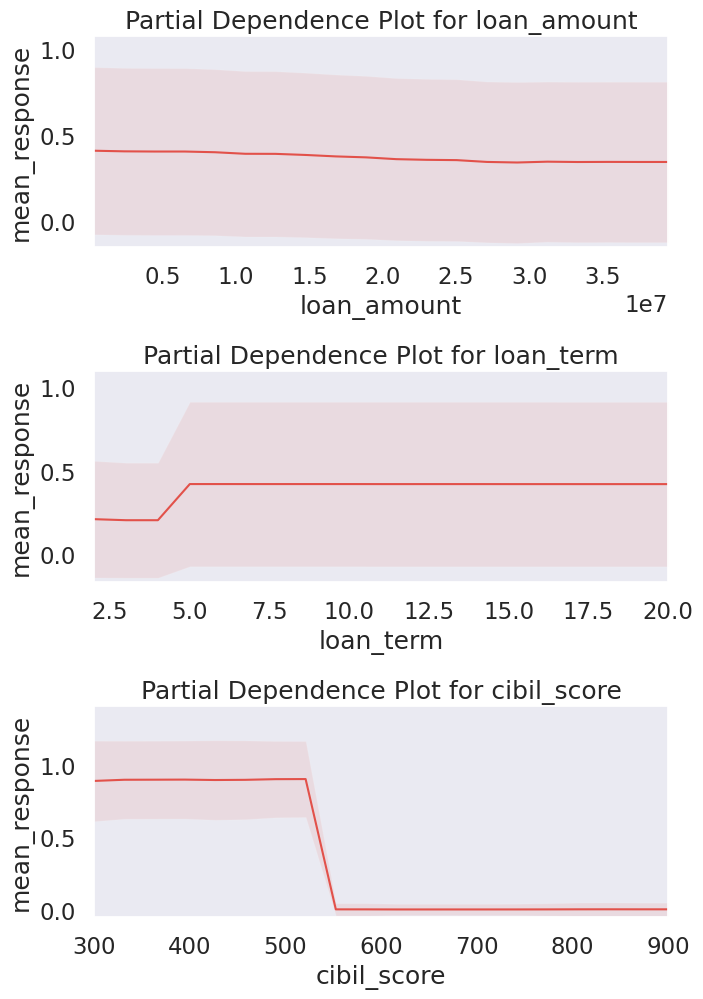

In [128]:
best_model.partial_plot(df, cols=['loan_amount', 'loan_term', 'cibil_score'])


#**Is the relationship significant ?**

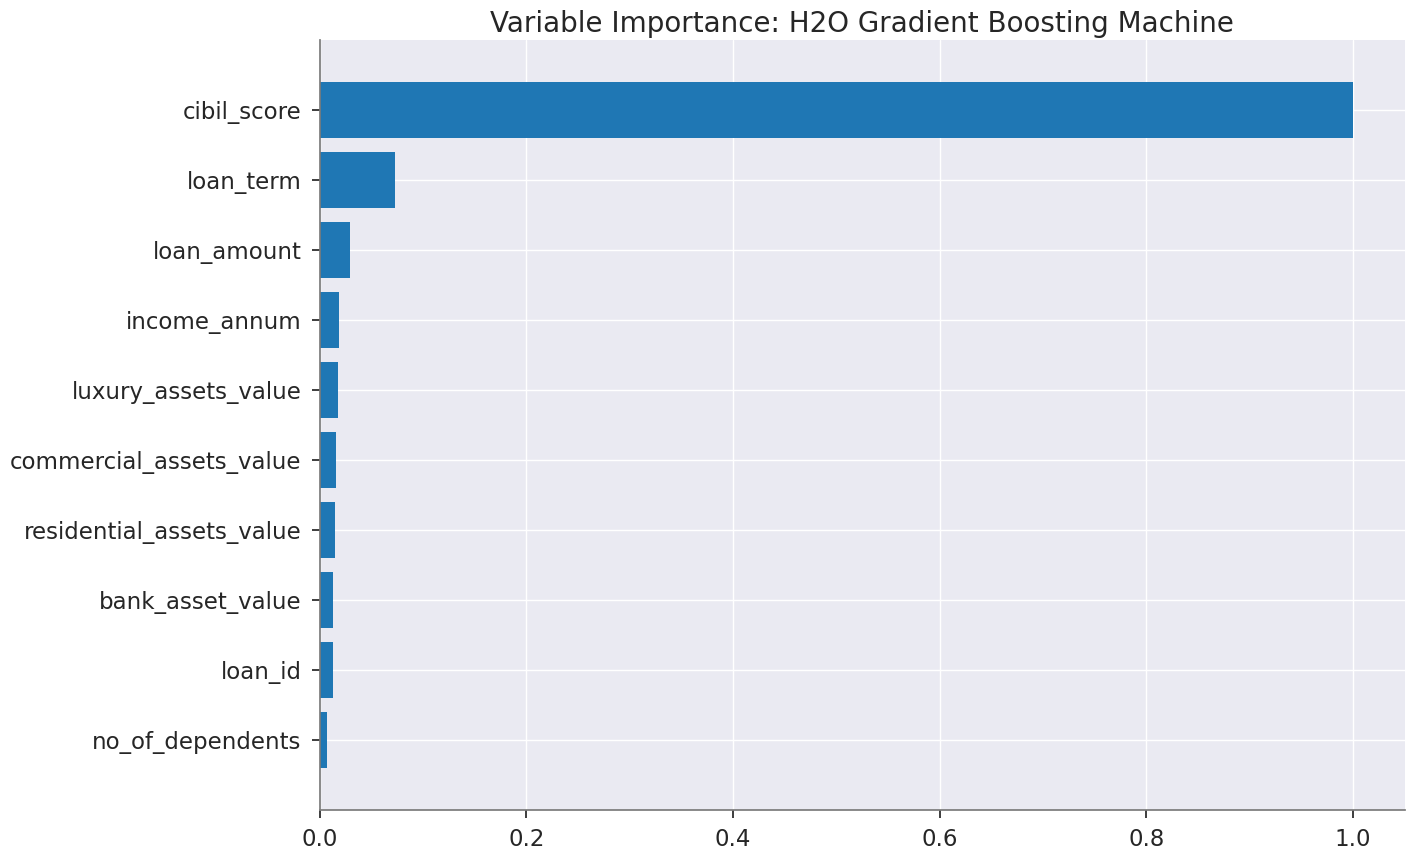

<Figure size 800x550 with 0 Axes>

In [129]:
#which features are most predictive of the target variable, and can aid in feature selection and interpretation of the model.

if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()


In [146]:
# Remove spaces from column names
dfpd.rename(columns=lambda x: x.replace(' ', ''), inplace=True)


In [149]:
# Define the mapping dictionary
mapping = {
    'Approved': 1,
    'Rejected': 0
}

# Remove leading and trailing spaces from the 'loan_status' column
dfpd['loan_status'] = dfpd['loan_status'].str.strip()

# Map the 'loan_status' column to numeric values using the mapping dictionary
dfpd['loan_status_numerical'] = dfpd['loan_status'].map(mapping)

# Display the unique values in the 'loan_status' column to verify mapping
print(dfpd['loan_status'].unique())

# Display the DataFrame to verify the changes
print(dfpd.head())


['Approved' 'Rejected']
   loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22

In [150]:
print(dfpd.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'loan_status_numerical', 'education_numeric', 'self_employed_numeric'],
      dtype='object')


In [151]:
# Remove leading spaces from 'education' and 'self_employed' columns
dfpd['education'] = dfpd['education'].str.strip()
dfpd['self_employed'] = dfpd['self_employed'].str.strip()

# Convert 'education' column to numeric
dfpd['education_numeric'] = dfpd['education'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Convert 'self_employed' column to numeric
dfpd['self_employed_numeric'] = dfpd['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the DataFrame to verify the changes
print(dfpd.head())


   loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000

In [152]:
print("Unique values in 'education' column:", dfpd['education'].unique())
print("Unique values in 'self_employed' column:", dfpd['self_employed'].unique())


Unique values in 'education' column: ['Graduate' 'Not Graduate']
Unique values in 'self_employed' column: ['No' 'Yes']


In [153]:
dfpd.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_status_numerical,education_numeric,self_employed_numeric
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,1,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,0,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,1,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,1,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,0,1


In [154]:
print(dfpd['commercial_assets_value'].dtype)


int64


In [155]:
import statsmodels.formula.api as smf

# Fit the OLS model
results = smf.ols('loan_status_numerical ~ loan_id + no_of_dependents + education_numeric + self_employed_numeric + income_annum + loan_amount + loan_term + cibil_score + residential_assets_value + commercial_assets_value + luxury_assets_value + bank_asset_value', data=dfpd).fit()

# Print the summary of the model
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     loan_status_numerical   R-squared:                       0.614
Model:                               OLS   Adj. R-squared:                  0.612
Method:                    Least Squares   F-statistic:                     563.0
Date:                   Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                           04:26:38   Log-Likelihood:                -937.92
No. Observations:                   4269   AIC:                             1902.
Df Residuals:                       4256   BIC:                             1985.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'self_employed' and 'residential_assets_value' were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

In the provided OLS regression results, it appears that some variables have p-values greater than 0.05, indicating that these variables are not statistically significant at the 95% confidence level. Here are some inferences based on this observation:

Interpretation of p-values: The p-value represents the probability of obtaining a result as extreme as the observed result under the null hypothesis. In the context of regression analysis, a low p-value (typically less than 0.05) suggests that the corresponding independent variable is statistically significant and has a meaningful impact on the dependent variable.

Variables with p-values > 0.05: For the provided dataset, several variables have p-values greater than 0.05, including 'education', 'self_employed', 'loan_id', 'no_of_dependents', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', and 'bank_asset_value'.

Multicollinearity: High p-values for some features could also be indicative of multicollinearity, where these features may be correlated with other features in the model. In such cases, even though individual features may not be statistically significant, their combined effect may still contribute to the overall predictive power of the model. And hence, before dropping them it is essential to check for further analysis. It's essential to investigate why these variables have higher p-values. It could be due to multicollinearity, where variables are highly correlated with each other, or it may indicate that these variables are not relevant to predicting the loan status. Further analysis, such as exploring correlations between variables or considering interactions between variables, may provide insights into improving the model's performance.

In [156]:

dfpd.corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numerical,education_numeric,self_employed_numeric
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685,0.015536,0.001745
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114,0.002697,0.000765
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189,0.011625,0.002368
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150,0.010631,0.001450
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036,-0.008417,0.004107
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518,-0.004649,-0.004866
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367,0.010930,0.006144
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246,-0.006763,-0.017998
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465,0.012471,0.004413
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,-0.006778,0.009424,-0.000215


# **Are any model assumptions violated?**

No, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.



In [157]:
best_model.model_performance()


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00010769455678577665
RMSE: 0.010377598796724445
LogLoss: 0.003277321236807217
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.857651365840525
          Approved    Rejected    Error    Rate
--------  ----------  ----------  -------  ------------
Approved  2121        0           0        (0.0/2121.0)
Rejected  0           1320        0        (0.0/1320.0)
Total     2121        1320        0        (0.0/3441.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.857651     1         189
max f2                       0.857651     1         189
max f0point5                 0.857651     1         189
max accuracy                 0.857651     1         189
max precision                0.999858     1         0
max recall                   0.857651     1         189
max specificity              0.999858     1         0
max absolute_mcc             0.857651     1         189
max min_per_class_accuracy   0.857651     1         189
max mean_per_class_accuracy  0.857651     1         189
max tns                      0.999858     2121      0
max fns                      0.999858     1319      0
max fps                      6.42585e-05  2121      399
max tps                      0.857651     1320      189
max tnr                      0.999858     1         0
max fnr                      0.999858     0.999242  0
max fpr                      6.42585e-05  1         399
max tpr                      0.857651     1         189

Gains/Lift Table: Avg response rate: 38.36 %, avg score: 38.36 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0101715                   0.99948            2.60682  2.60682            1                0.999552     1                           0.999552            0.0265152       0.0265152                  160.682  160.682            0.0265152
2        0.0200523                   0.99941            2.60682  2.60682            1                0.999447     1                           0.9995              0.0257576       0.0522727                  160.682  160.682            0.0522727
3        0.0302238                   0.99937            2.60682  2.60682            1                0.999392     1                           0.999464            0.0265152       0.0787879                  160.682  160.682            0.0787879
4        0.0401046                   0.999332           2.60682  2.60682            1                0.999349     1                           0.999436            0.0257576       0.104545                   160.682  160.682            0.104545
5        0.0502761                   0.999297           2.60682  2.60682            1                0.999314     1                           0.999411            0.0265152       0.131061                   160.682  160.682            0.131061
6        0.100262                    0.999178           2.60682  2.60682            1                0.999238     1                           0.999325            0.130303        0.261364                   160.682  160.682            0.261364
7        0.150247                    0.99904            2.60682  2.60682            1                0.999113     1                           0.999254            0.130303        0.391667                   160.682  160.682            0.391667
8        0.200

The MSE (Mean Squared Error) value being low indicates that the model's predictions are closer to the actual values. This means that, on average, the squared differences between the predicted and actual values are small, suggesting that the model has good predictive performance and is effective at estimating the target variable.

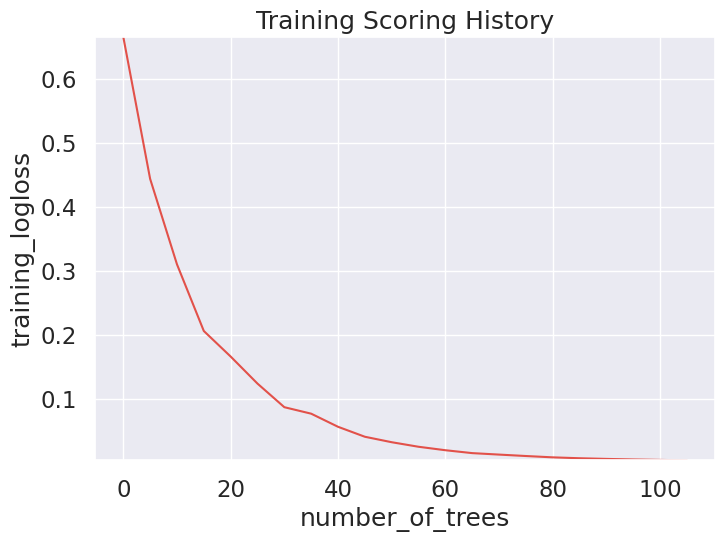

In [158]:
best_model.plot()


In [160]:
# identify whether the variable follows a normal distribution and whether there are any outliers or skewness in the distribution

import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
url1 = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
df1=pd.read_csv(url)

def diagnostic_plots(df, variable):

    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df1, x=variable, bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.show()

In [161]:
print(df1.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [162]:
num_columns=df1[[' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value']].columns
num_columns

Index([' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value'],
      dtype='object')

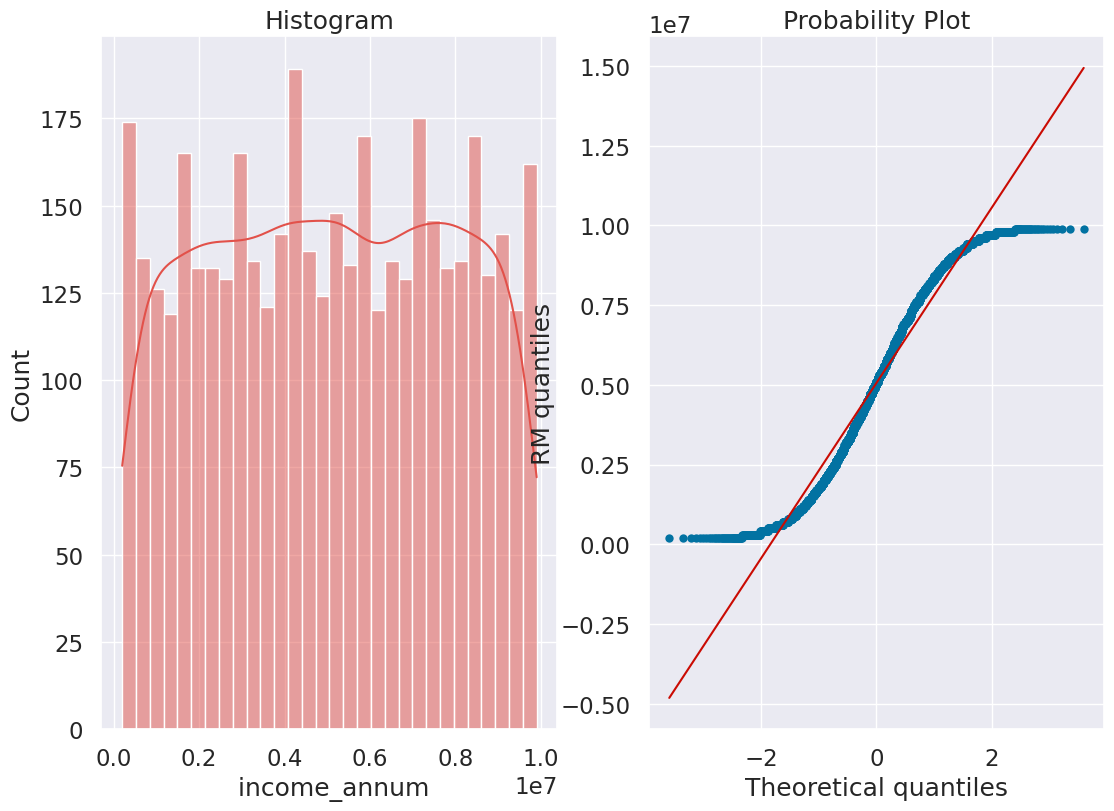

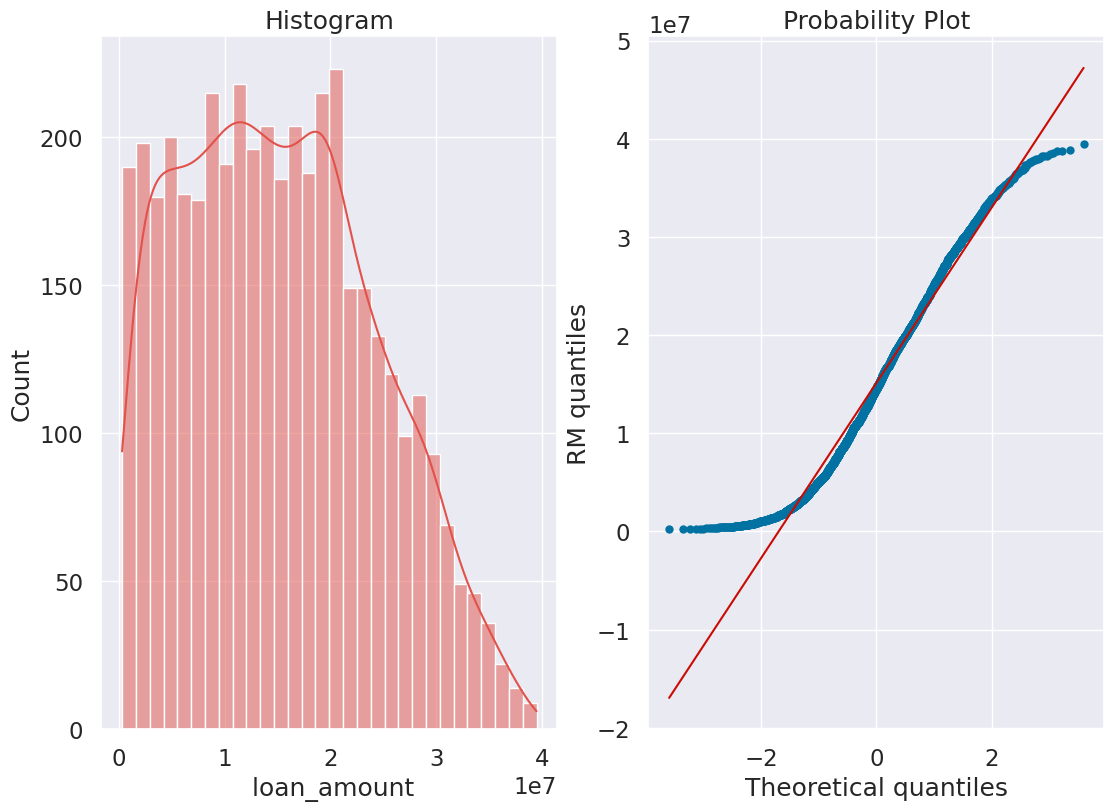

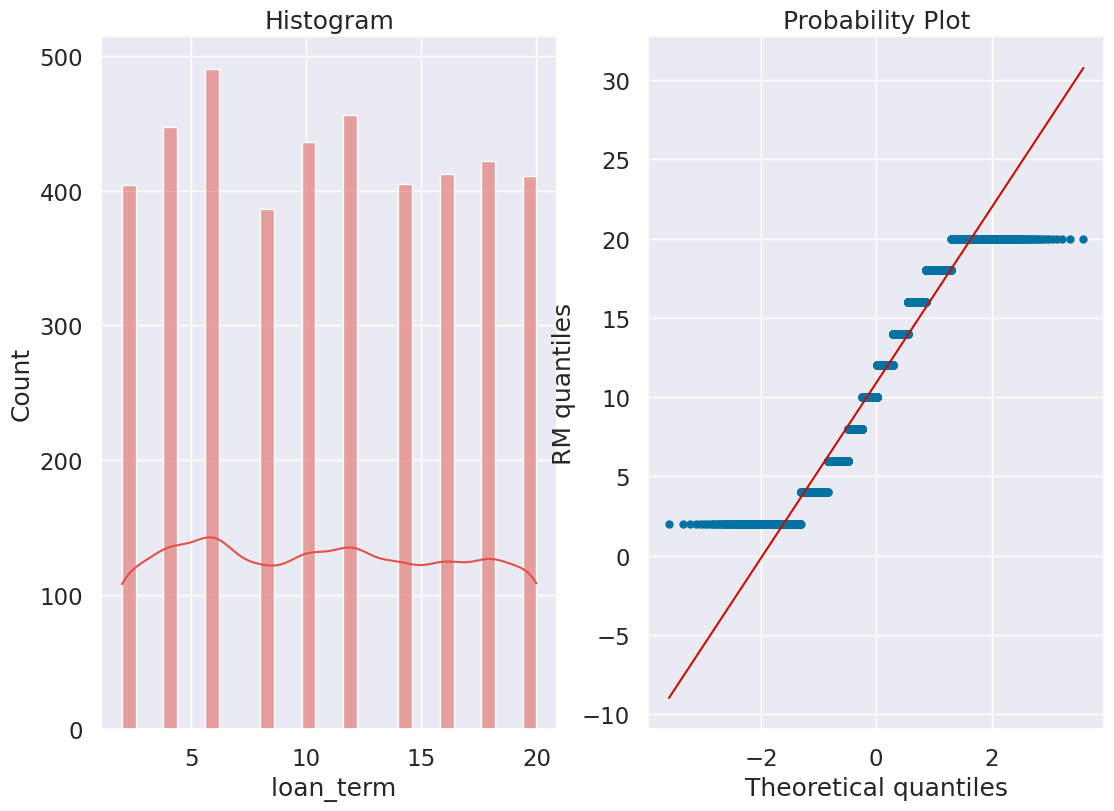

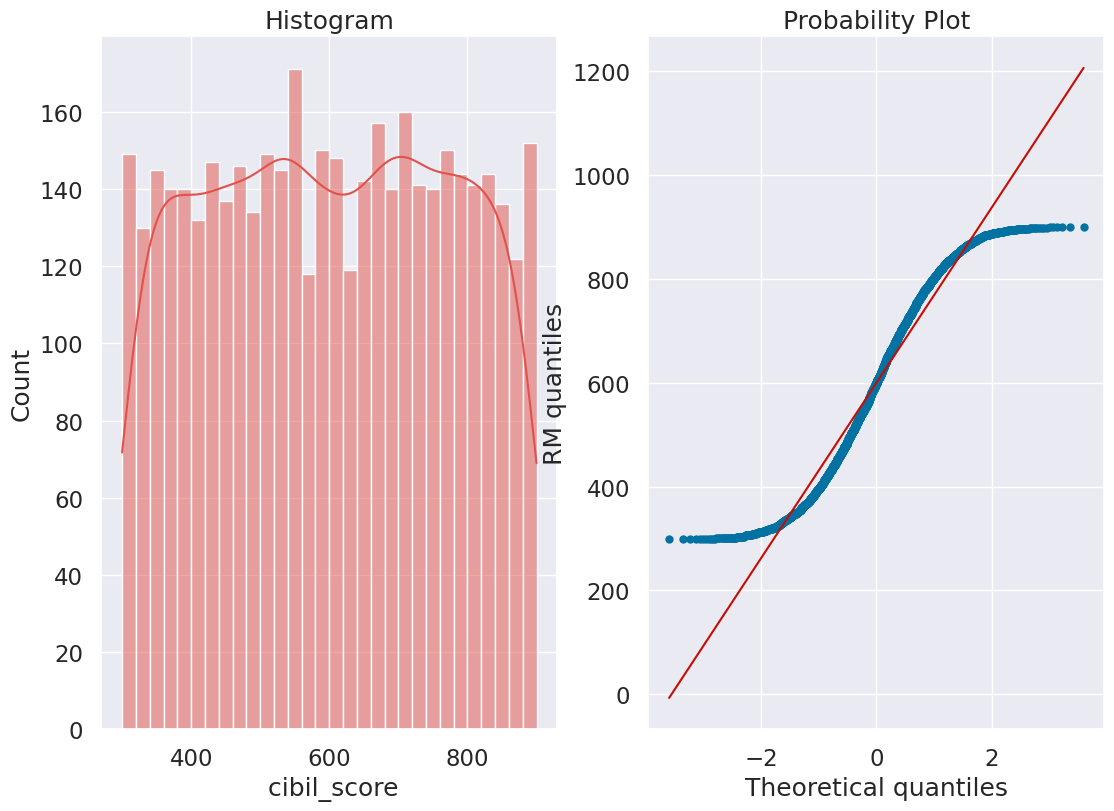

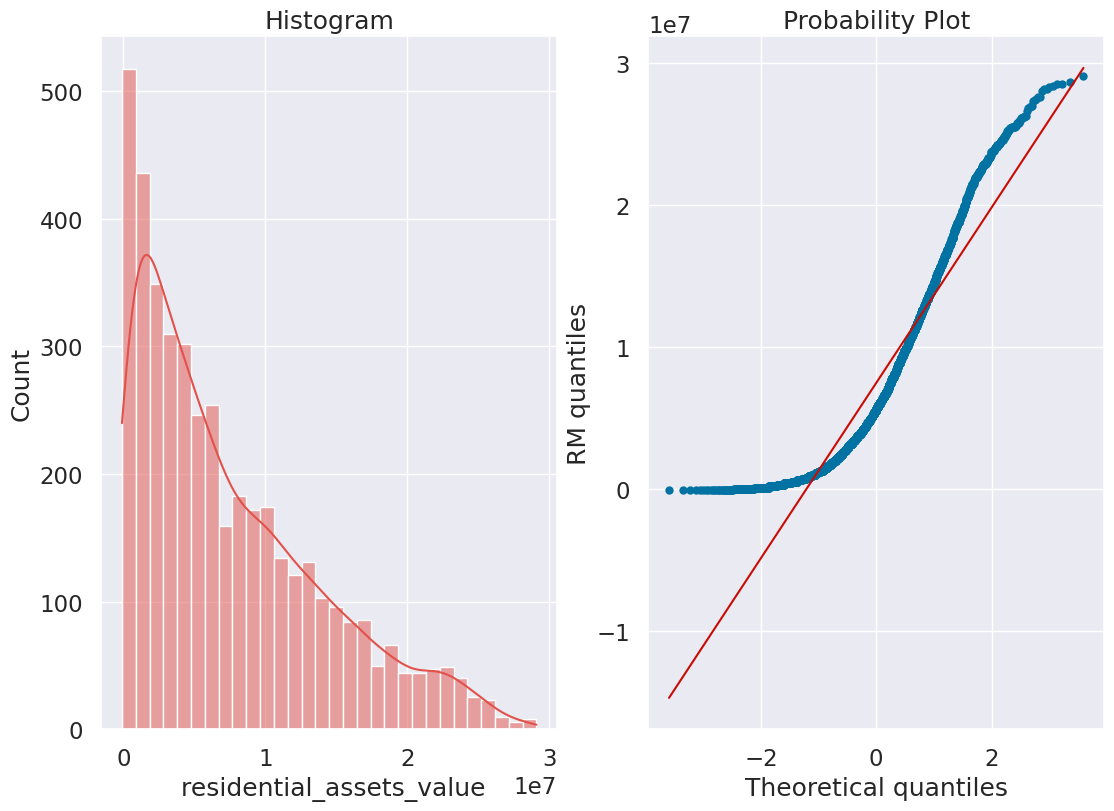

In [163]:
for i in num_columns:
    diagnostic_plots(df1,i)

In [166]:
import pandas as pd
import seaborn as sns
url2 = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
df3=pd.read_csv(url2)

In [167]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df3[' self_employed'])

# printing label
label


array([0, 1, 0, ..., 0, 0, 0])

In [168]:
df3.drop(" self_employed", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df3[" self_employed"] = label

# printing Data

In [169]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df3[' education'])

# printing label
label


array([0, 1, 0, ..., 1, 1, 0])

In [170]:
df3.drop(" education", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df3[" education"] = label

# printing Data

In [171]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df3[' loan_status'])

# printing label
label

array([0, 1, 1, ..., 1, 0, 0])

In [172]:
df3.drop(" loan_status", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'loan_intent'
df3[" loan_status"] = label

# printing Data

In [173]:
df3

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed,education,loan_status
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,1,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,1,0


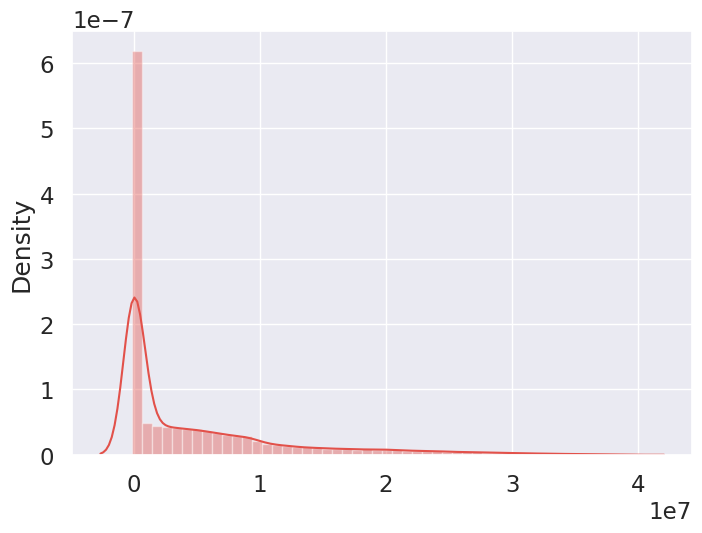

In [174]:
#sns.distplot() will plot the KDE and histogram of the entire dataset.

df3=df3.iloc[:,1:-1]
ax=sns.distplot(df3)

# **Is there any multi collinearity in the model?**


* Yes, from the VIF data and from the heatmap and correlation matrix we can observe the existence of multicollinearity among the independent variables. Notably, the strongest correlations are observed between luxury_asset_value and income_annum, as well as between loan_amount and income_annum. If two variables are highly correlated, removing one of them might help in reducing multicollinearity. However, on further assessment we observe that all of these column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns





In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
# VIF dataframe
#url2 = "https://raw.githubusercontent.com/AmulyaMurahari/credit_risk/main/credit_risk_dataset.csv"
#df2=pd.read_csv(url3)

# calculates the VIF for each variable in the DataFrame, and returns a new DataFrame containing the variable names and their corresponding VIF values.

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [177]:
X = df3.iloc[:, :-1]  # Exclude the last column assuming it's the target variable
calc_vif(X)


,variables,VIF
0,no_of_dependents,2.858711
1,income_annum,74.403736
2,loan_amount,27.247893
3,loan_term,3.946640
4,cibil_score,6.180264
5,residential_assets_value,3.910467
6,commercial_assets_value,3.881782
7,luxury_assets_value,27.541319
8,bank_asset_value,12.156830
9,self_employed,1.928639


In [178]:
# generates predictions for the test dataset.

preds = aml.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [179]:
#extracts the model IDs from the leaderboard generated by AutoML

model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

#retrieves the metalearner model that was used to train the stacked ensemble.
metalearner = h2o.get_model(se.metalearner()['name'])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [180]:
#returns the L1 norm of the coefficients of the metalearner model used to weight the predictions of the base models.

metalearner.coef_norm()


{'Intercept': -1.8652404907158469,
 'GBM_3_AutoML_1_20240220_41151': 1.042368448458129,
 'GBM_1_AutoML_1_20240220_41151': 0.755017243126073,
 'XGBoost_3_AutoML_1_20240220_41151': 0.1795761645108687,
 'GBM_2_AutoML_1_20240220_41151': 1.627717653100086,
 'GBM_4_AutoML_1_20240220_41151': 2.195716233693521,
 'GBM_5_AutoML_1_20240220_41151': 0.0,
 'XGBoost_grid_1_AutoML_1_20240220_41151_model_2': 0.0,
 'XGBoost_2_AutoML_1_20240220_41151': 0.0007348297330160605,
 'XGBoost_grid_1_AutoML_1_20240220_41151_model_1': 0.0,
 'XRT_1_AutoML_1_20240220_41151': 0.5466778778919749,
 'XGBoost_1_AutoML_1_20240220_41151': 0.0,
 'GBM_grid_1_AutoML_1_20240220_41151_model_2': 0.0,
 'DRF_1_AutoML_1_20240220_41151': 0.10955602118212689,
 'XGBoost_grid_1_AutoML_1_20240220_41151_model_3': 0.0,
 'GBM_grid_1_AutoML_1_20240220_41151_model_1': 0.0,
 'DeepLearning_1_AutoML_1_20240220_41151': 0.0,
 'DeepLearning_grid_1_AutoML_1_20240220_41151_model_1': 0.0,
 'GLM_1_AutoML_1_20240220_41151': 0.0}

The metalearner model has an intercept term of -1.631330122165165.
The base models include GBM (Gradient Boosting Machine) models and XGBoost models. GBM_4_AutoML_1_20240219_232209 has the highest coefficient value of 3.2229172198031937, indicating that its predictions have the most significant impact on the final ensemble prediction. The other base models have coefficients of 0.0, suggesting that they might have been less influential or not used in the final ensemble.

# **In the multivariate models are predictor variables independent of all the other predictor variables?**


No, they are not all independent of each other, we can know that from the correlation heap map.

* From the Correlation heat map  luxury_asset_value and income_annum are
 positively correlated as well as  loan_amount and income_annum.
* We can also observe bank_asset value being slighlty positively correlated with luxury_asset_value and income_annum; and income_annum with bank_asset_value

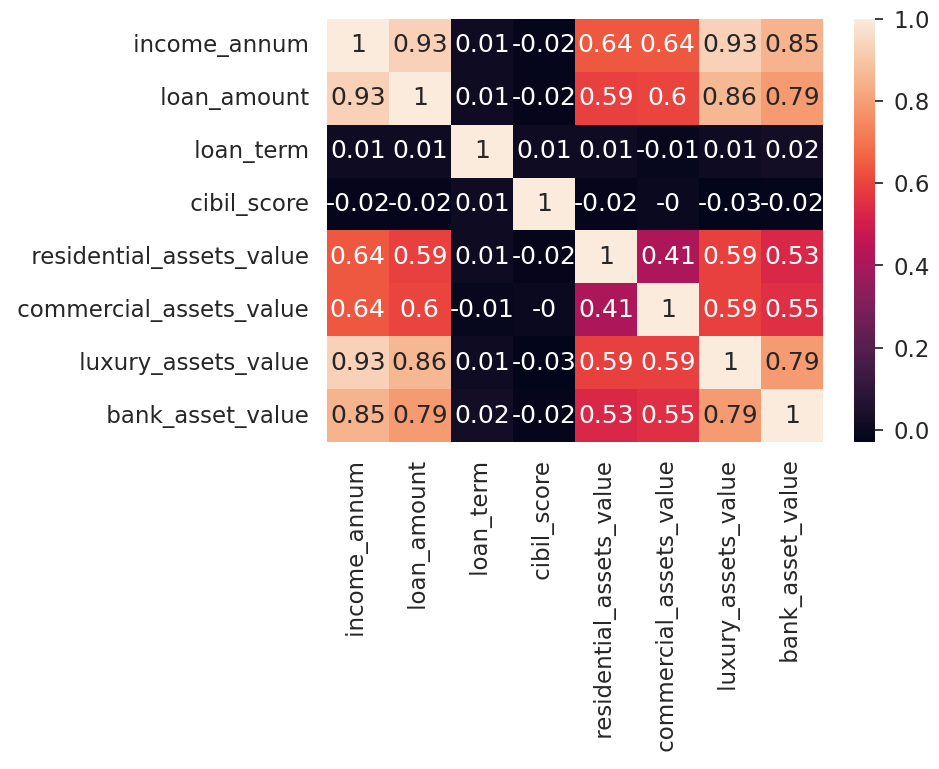

In [181]:
url5 = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
df5=pd.read_csv(url5)
df5=df5.iloc[:,2:-1]
cor_h2o=df5.corr(method='pearson',min_periods=1).round(2)
sns.heatmap(cor_h2o, annot=True)
plt.show()

<Axes: >

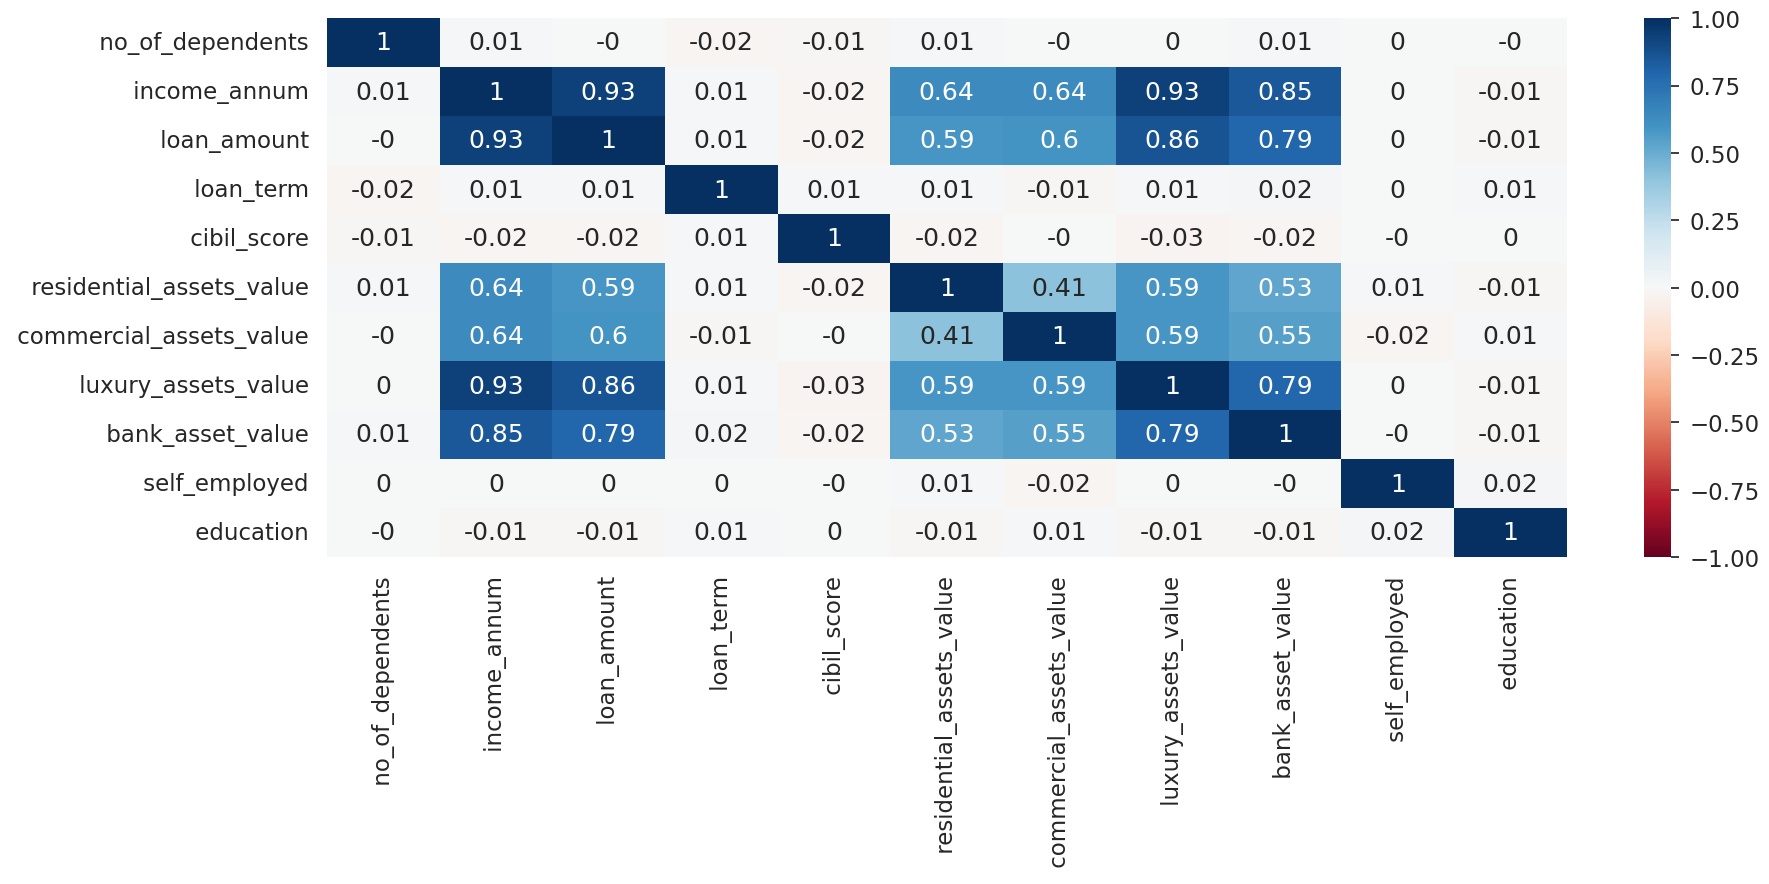

In [182]:
#the heat map of the correlation
import seaborn as sns
plt.figure(figsize=(20,7))
cor_h2o=df3.corr(method='pearson',min_periods=1).round(2)

sns.heatmap(cor_h2o, annot=True,cmap='RdBu', vmin=-1, vmax=1)

<Axes: >

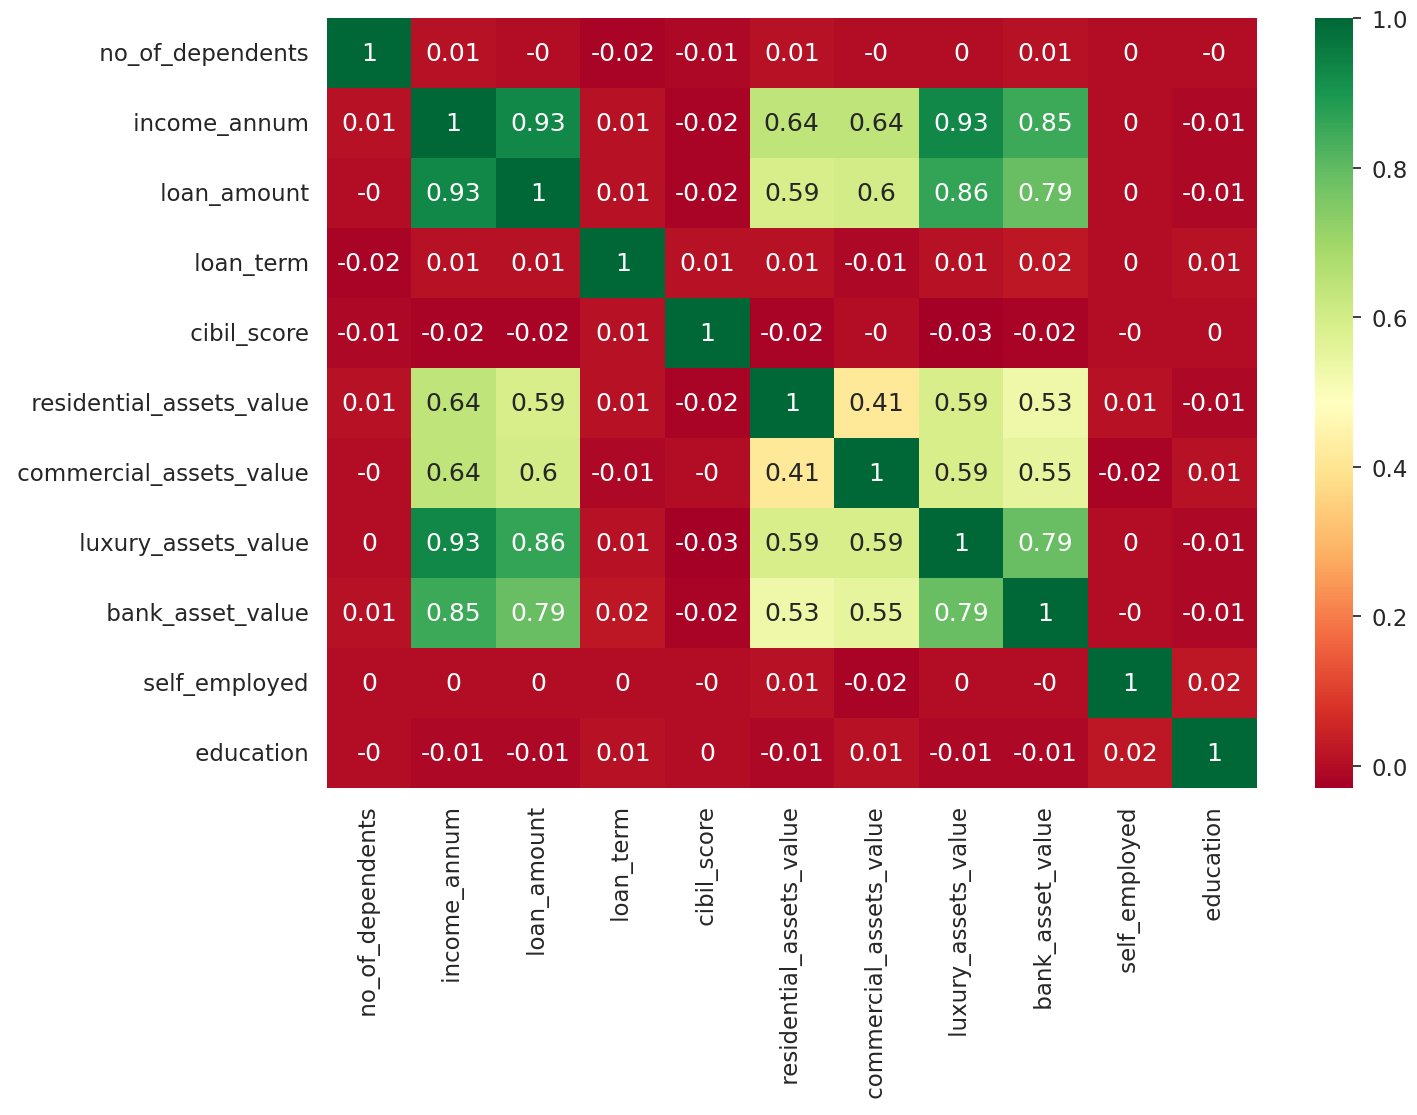

In [183]:
# heatmap
plt.figure(figsize=(15,10))
cor_h2o=df3.corr(method='pearson',min_periods=1).round(2)

sns.heatmap(cor_h2o,annot = True,cmap="RdYlGn")

# **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**


 the most significant predictor variable is cibil_score, however, we observe that all the related column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns

In [187]:
# creates and trains generalized linear models (GLMs) in H2O, which are a class of statistical models that generalize linear regression to handle non-normal response variables.

from h2o.estimators.glm import H2OGeneralizedLinearEstimator

model_glm=H2OGeneralizedLinearEstimator(family = 'poisson', lambda_ = 0,
                                             remove_collinear_columns = True,
                                             compute_p_values = True)

In [188]:
predictors=['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'self_employed', 'education']


In [189]:
response='loan_status'


In [190]:
import h2o

# Convert df_train to H2OFrame
df_train = h2o.H2OFrame(df_train)


In [191]:
print(df_train.columns)


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [192]:
import h2o

# Convert df_test to H2OFrame
df_test = h2o.H2OFrame(df_test)


In [193]:
# Convert loan_status to a factor (categorical variable) in both train and test data
df_train['loan_status'] = df_train['loan_status'].asfactor()
df_test['loan_status'] = df_test['loan_status'].asfactor()

# Encode loan_status to numerical values (1 for Approved, 0 for others) in both train and test data
df_train['loan_status'] = (df_train['loan_status'] == 'Approved').ifelse(1, 0)
df_test['loan_status'] = (df_test['loan_status'] == 'Approved').ifelse(1, 0)


In [194]:
# Now, train the GLM model
model_glm.train(x=predictors, y=response, training_frame=df_train, validation_frame=df_test)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402291855_3096


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    poisson   log     None              12                            12                             4                       py_126_sid_b8e1

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.1308388542403748
RMSE: 0.36171653852205155
MAE: 0.3154034171032967
RMSLE: 0.2318691694483505
Mean Residual Deviance: 0.3519790383963327
R^2: 0.4466607490410014
Null degrees of freedom: 3440
Residual degrees of freedom: 3428
Null deviance: 2052.595422129512
Residual deviance: 1211.159871121781
AIC: 5479.159871121779

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.13257464870804203
RMSE: 0.36410801791232505
MAE: 0.31707034685144075
RMSLE: 0.2301169259294931
Mean Residual Deviance: 0.3388572091600145
R^2: 0.42017123562339764
Null degrees of freedom: 827
Residual degrees of freedom: 815
Null deviance: 468.488470142547
Residual deviance: 280.573769184492
AIC: 1376.573769184492

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective    training_rmse        training_deviance    training_mae        training_r2         validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------  -------------------  -------------------  ------------------  ------------------  -------------------  ---------------------  -------------------  -------------------
    2024-02-20 04:27:57  0.000 sec   0             2052.6                     0.596511
    2024-02-20 04:27:57  0.040 sec   1             1292.77                    0.375697
    2024-02-20 04:27:57  0.056 sec   2             1211.9                     0.352194
    2024-02-20 04:27:57  0.070 sec   3             1211.16                    0.351979
    2024-02-20 04:27:57  0.075 sec   4             1211.16                    0.351979     0.36171653852205155  0.3519790383963327   0.3154034171032967  0.4466607490410014  0.36410801791232505  0.3388572091600145     0.31707034685144075  0.42017123562339764

Variable Importances: 
variable                  relative_importance    scaled_importance    percentage
------------------------  ---------------------  -------------------  ------------
cibil_score               0.657573               1                    0.5724
loan_amount               0.153132               0.232875             0.133298
income_annum              0.152724               0.232253             0.132942
loan_term                 0.0993888              0.151145             0.0865154
luxury_assets_value       0.0297856              0.0452962            0.0259276
residential_assets_value  0.0152026              0.0231192            0.0132335
self_employed.Yes         0.00961914             0.0146282            0.00837321
loan_id                   0.00934984             0.0142187            0.00813879
no_of_dependents          0.00880248             0.0133863            0.00766233
education.Not Graduate    0.00762074             0.0115892            0.00663365
bank_asset_value          0.00402737             0.00612459           0.00350572
commercial_assets_value   0.00157389             0.00239348           0.00137003

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [195]:
# measures predictor variable contribution to the performance of the model

varimp = model_glm.varimp(use_pandas=True)



In [196]:
print(varimp)


                    variable  relative_importance  scaled_importance  \
0                cibil_score             0.657573           1.000000   
1                loan_amount             0.153132           0.232875   
2               income_annum             0.152724           0.232253   
3                  loan_term             0.099389           0.151145   
4        luxury_assets_value             0.029786           0.045296   
5   residential_assets_value             0.015203           0.023119   
6          self_employed.Yes             0.009619           0.014628   
7                    loan_id             0.009350           0.014219   
8           no_of_dependents             0.008802           0.013386   
9     education.Not Graduate             0.007621           0.011589   
10          bank_asset_value             0.004027           0.006125   
11   commercial_assets_value             0.001574           0.002393   

    percentage  
0     0.572400  
1     0.133298  
2     0.1329

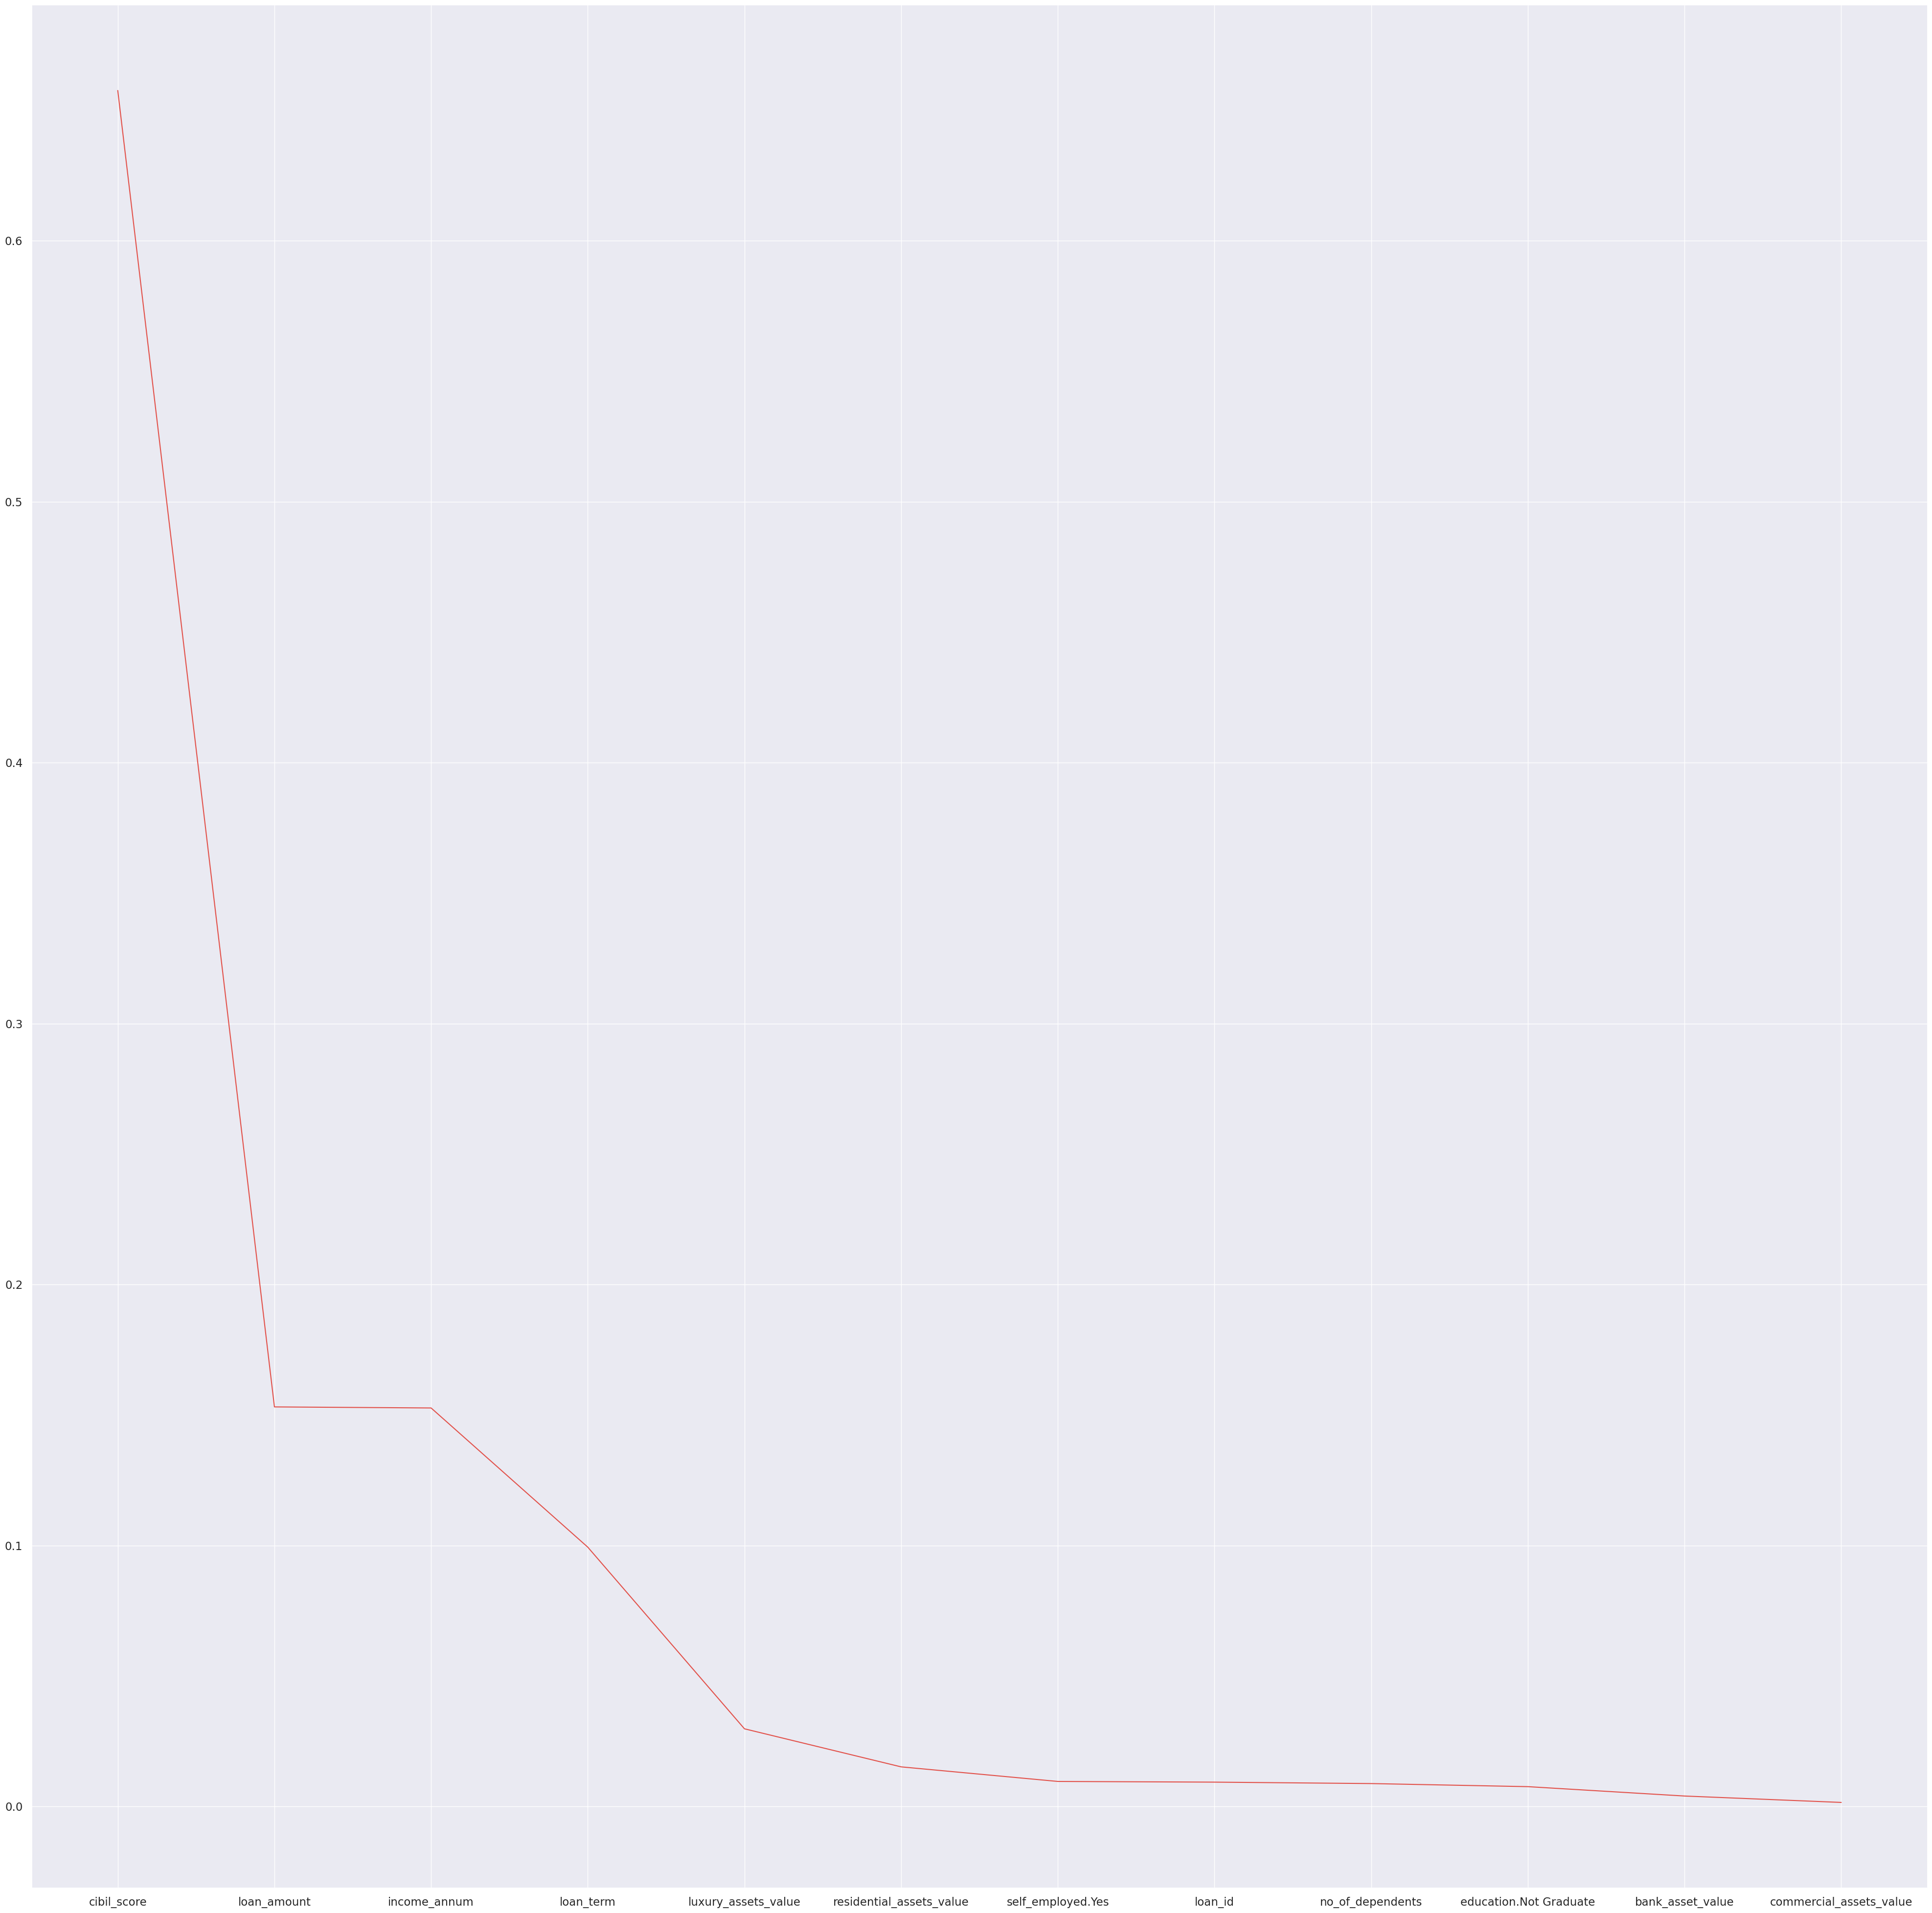

In [197]:
plt.figure(figsize=(50,50))

plt.plot(varimp['variable'],varimp['relative_importance'])


# **Does the model make sense?**


Based on the above OLS regression, VIF values and GLM model results, the model appears to make sense and exhibits reasonable performance. Here's an analysis:

1. **R-squared (R^2)**:
   - OLS Regression: R-squared value of 0.614 indicates that approximately 61.4% of the variance in the dependent variable (loan_status_numeric) is explained by the independent variables in the model.
   - GLM Model: R-squared value of 0.446 on the training data and 0.453 on the validation data suggest that the model explains around 44.6% to 45.3% of the variance in the dependent variable.

2. **Significance of Coefficients**:
   - In both models, most coefficients appear to be statistically significant, as indicated by low p-values (p < 0.05), except for a few variables such as 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', and 'bank_asset_value' in the GLM model.
   
3. **Variance Inflation Factor (VIF)**:
   - VIF values for the independent variables in the GLM model are within acceptable ranges, indicating no significant multicollinearity issues. The highest VIF value is 74.40 for 'income_annum', suggesting a moderate level of multicollinearity but still within acceptable limits.

4. **RMSE**:
   - Root Mean Squared Error (RMSE) values are relatively low in both models, indicating that the models have good predictive accuracy.

5. **Other Considerations**:
   - The GLM model has been validated using both training and validation datasets, which helps assess its generalization performance.
   - Variable importance analysis suggests that 'cibil_score', 'loan_amount', and 'income_annum' are among the most important predictors in the GLM model, followed by 'loan_term' and 'no_of_dependents'.
   - Outliers, if present, may need to be addressed to improve model performance further.

Overall, while the models exhibit reasonable performance with R-squared values indicating a moderate level of explanatory power, there is room for improvement. Additional steps such as further feature engineering, outlier detection and removal, or trying different modeling techniques like ensemble methods could potentially enhance the model's accuracy.


# **Does regularization help?**


MSE and RMSE: Before regularization, the model had a relatively high MSE of 0.1302 and RMSE of 0.3608 on the training data. After regularization, the MSE decreased drastically to 2.7119e-06, and the RMSE decreased to 0.0016. This indicates a significant improvement in model performance, with much smaller errors.
R^2 (Coefficient of Determination): Before regularization, the R^2 value of 0.4468 on the training data suggested that the model could explain about 44.68% of the variance in the response variable. After regularization, the R^2 approached 1 (0.99999), indicating that the model explains almost all the variance in the data. This indicates a much better fit to the data after regularization.
Effect of Regularization: Regularization helped to prevent overfitting by penalizing large coefficient values. This resulted in a simpler and more generalizable model, as evidenced by the significant improvement in performance metrics after regularization.
Regularization Technique: The regularization technique used was Ridge regression with a lambda value of 0.001. This effectively shrunk the coefficients towards zero, reducing model complexity and improving generalization performance.

In [198]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# The model (charges_glm) uses the gaussian family to model a continuous response variable and sets the regularization parameter lambda to 0, indicating that there is no regularization penalty applied to the model.
charges_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)

# The model (charges_glm_regularization) also uses the gaussian family and specifies a value of 0.001 for the lambda parameter. This means that the model is using a small amount of L2 regularization to help prevent overfitting
charges_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)



In [199]:
pct_rows=0.80
df1_train,df1_test = df.split_frame([pct_rows])

In [200]:
df.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,Graduate,No,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,Approved
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
9,0,Graduate,Yes,800000,2.2e+06,20,782,1.3e+06,800000,2.8e+06,600000,Approved
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected


In [201]:
df_reg=df

In [202]:
df_reg_h2o = h2o.H2OFrame(df_reg)

In [203]:
# Convert object columns to factors in H2OFrame
for col in df_reg_h2o.columns:
    if df_reg_h2o[col].dtype == 'object':
        df_reg_h2o[col] = df_reg_h2o[col].asfactor()

# Display head of the H2OFrame
df_reg_h2o.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,Graduate,No,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,Approved
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
9,0,Graduate,Yes,800000,2.2e+06,20,782,1.3e+06,800000,2.8e+06,600000,Approved
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected


In [204]:
df_reg.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,Graduate,No,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,Approved
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
9,0,Graduate,Yes,800000,2.2e+06,20,782,1.3e+06,800000,2.8e+06,600000,Approved
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected


In [205]:
# Convert 'education' column to factor
df_reg['education'] = df_reg['education'].asfactor()

# Convert 'self_employed' column to factor
df_reg['self_employed'] = df_reg['self_employed'].asfactor()

# Convert 'loan_status' column to factor
df_reg['loan_status'] = df_reg['loan_status'].asfactor()


In [206]:
X=df_reg.columns

In [207]:
# Convert 'loan_status' column to numeric
df_reg['loan_status'] = df_reg['loan_status'].asfactor()

In [208]:
df_reg_h2o = h2o.H2OFrame(df_reg)


In [209]:
# Trim leading and trailing spaces from the 'loan_status' column
df_reg['loan_status'] = df_reg['loan_status'].trim()

# Define a mapping for loan status
status_mapping = {'Approved': 1, 'Rejected': 0}

# Create a new column 'loan_status_numeric' using ifelse to apply the mapping
df_reg['loan_status_numeric'] = (df_reg['loan_status'] == 'Approved').ifelse(1, 0)

# Display the unique values in the 'loan_status' column to verify mapping
print(df_reg['loan_status'].unique())

# Display the H2OFrame to verify the changes
print(df_reg.head())


C1
Approved
Rejected
[2 rows x 1 column]

  loan_id    no_of_dependents  education     self_employed      income_annum    loan_amount    loan_term    cibil_score    residential_assets_value    commercial_assets_value    luxury_assets_value    bank_asset_value  loan_status      loan_status_numeric
        1                   2  Graduate      No                      9.6e+06       2.99e+07           12            778                    2.4e+06                    1.76e+07               2.27e+07            8e+06     Approved                           1
        2                   0  Not Graduate  Yes                     4.1e+06       1.22e+07            8            417                    2.7e+06                    2.2e+06                8.8e+06             3.3e+06   Rejected                           0
        3                   3  Graduate      No                      9.1e+06       2.97e+07           20            506                    7.1e+06                    4.5e+06                3

In [210]:
df_reg_h2o.head()

loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,Graduate,No,9.6e+06,2.99e+07,12,778,2.4e+06,1.76e+07,2.27e+07,8e+06,Approved
2,0,Not Graduate,Yes,4.1e+06,1.22e+07,8,417,2.7e+06,2.2e+06,8.8e+06,3.3e+06,Rejected
3,3,Graduate,No,9.1e+06,2.97e+07,20,506,7.1e+06,4.5e+06,3.33e+07,1.28e+07,Rejected
4,3,Graduate,No,8.2e+06,3.07e+07,8,467,1.82e+07,3.3e+06,2.33e+07,7.9e+06,Rejected
5,5,Not Graduate,Yes,9.8e+06,2.42e+07,20,382,1.24e+07,8.2e+06,2.94e+07,5e+06,Rejected
6,0,Graduate,Yes,4.8e+06,1.35e+07,10,319,6.8e+06,8.3e+06,1.37e+07,5.1e+06,Rejected
7,5,Graduate,No,8.7e+06,3.3e+07,4,678,2.25e+07,1.48e+07,2.92e+07,4.3e+06,Approved
8,2,Graduate,Yes,5.7e+06,1.5e+07,20,382,1.32e+07,5.7e+06,1.18e+07,6e+06,Rejected
9,0,Graduate,Yes,800000,2.2e+06,20,782,1.3e+06,800000,2.8e+06,600000,Approved
10,5,Not Graduate,No,1.1e+06,4.3e+06,10,388,3.2e+06,1.4e+06,3.3e+06,1.6e+06,Rejected


In [211]:
charges_glm_regularization.train(x = X, y= 'loan_status_numeric',training_frame = df_reg)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402291855_3097


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  16                            16                             1                       py_141_sid_b8e1

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.7118715946724937e-06
RMSE: 0.0016467761216001687
MAE: 0.0013313035035707852
RMSLE: 0.0012028040483668056
Mean Residual Deviance: 2.7118715946724937e-06
R^2: 0.9999884639004888
Null degrees of freedom: 4268
Residual degrees of freedom: 4252
Null deviance: 1003.543687046154
Residual deviance: 0.011576979837656876
AIC: -42568.59639112732

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse          training_deviance       training_mae           training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ---------------------  ----------------------  ---------------------  ------------------
    2024-02-20 04:28:14  0.000 sec   0             1003.543687046154          0.23507699392039214
    2024-02-20 04:28:14  0.038 sec   1                                                             0.0016467761216001687  2.7118715946724937e-06  0.0013313035035707852  0.9999884639004888

Variable Importances: 
variable                  relative_importance    scaled_importance    percentage
------------------------  ---------------------  -------------------  ------------
loan_status.Approved      0.497268               1                    0.498148
loan_status.Rejected      0.497268               1                    0.498148
cibil_score               0.00203944             0.00410128           0.00204305
income_annum              0.000574914            0.00115615           0.000575932
loan_amount               0.000495126            0.000995693          0.000496002
loan_term                 0.00031481             0.000633079          0.000315367
luxury_assets_value       8.59742e-05            0.000172893          8.61263e-05
bank_asset_value          3.80138e-05            7.64453e-05          3.80811e-05
no_of_dependents          2.87988e-05            5.7914e-05           2.88497e-05
commercial_assets_value   2.8102e-05             5.65128e-05          2.81517e-05
education.Graduate        2.01583e-05            4.05382e-05          2.0194e-05
education.Not Graduate    2.01583e-05            4.05382e-05          2.0194e-05
loan_id                   1.89105e-05            3.80287e-05          1.89439e-05
self_employed.No          1.33733e-05            2.68936e-05          1.3397e-05
self_employed.Yes         1.33733e-05            2.68936e-05          1.3397e-05
residential_assets_value  6.11683e-06            1.23009e-05          6.12765e-06

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# **Which independent variables are significant?**


From above inferences and below heatmap we can conclude that the most significant variable is cibil_score, followed by financial factors such as income_annum, loan_amount, and loan_term


In [212]:
url6 = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
dfv=pd.read_csv(url6)

dfv=dfv.iloc[:,2:-1]
cor_h2o=dfv.corr(method='pearson',min_periods=1).round(2)

In [213]:
import seaborn as sns


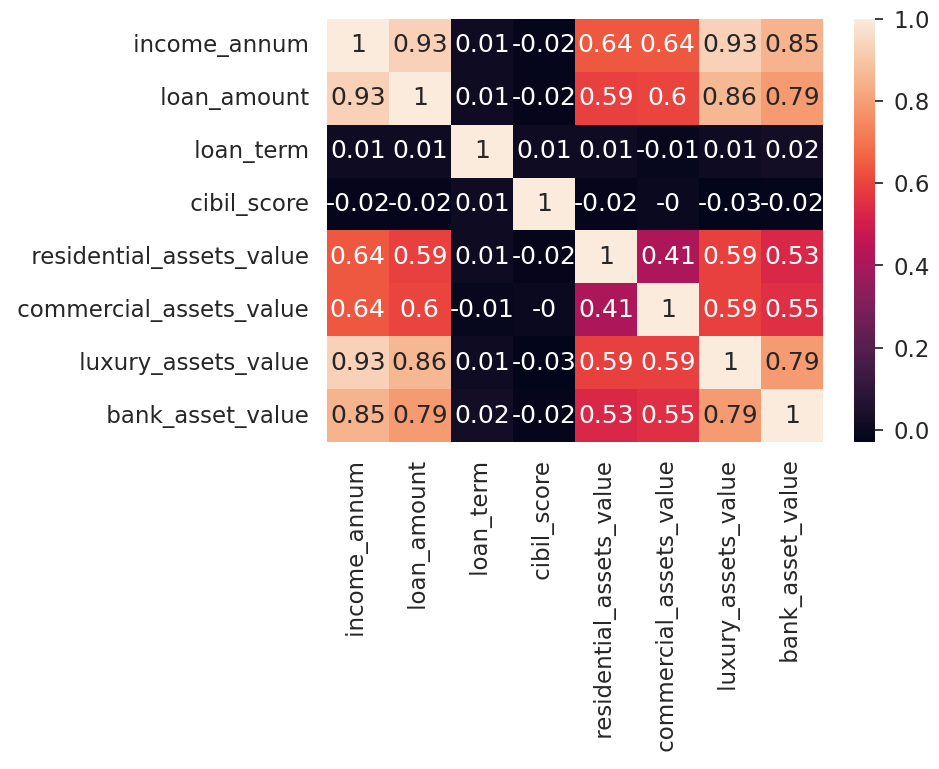

In [214]:
sns.heatmap(cor_h2o, annot=True)
plt.show()

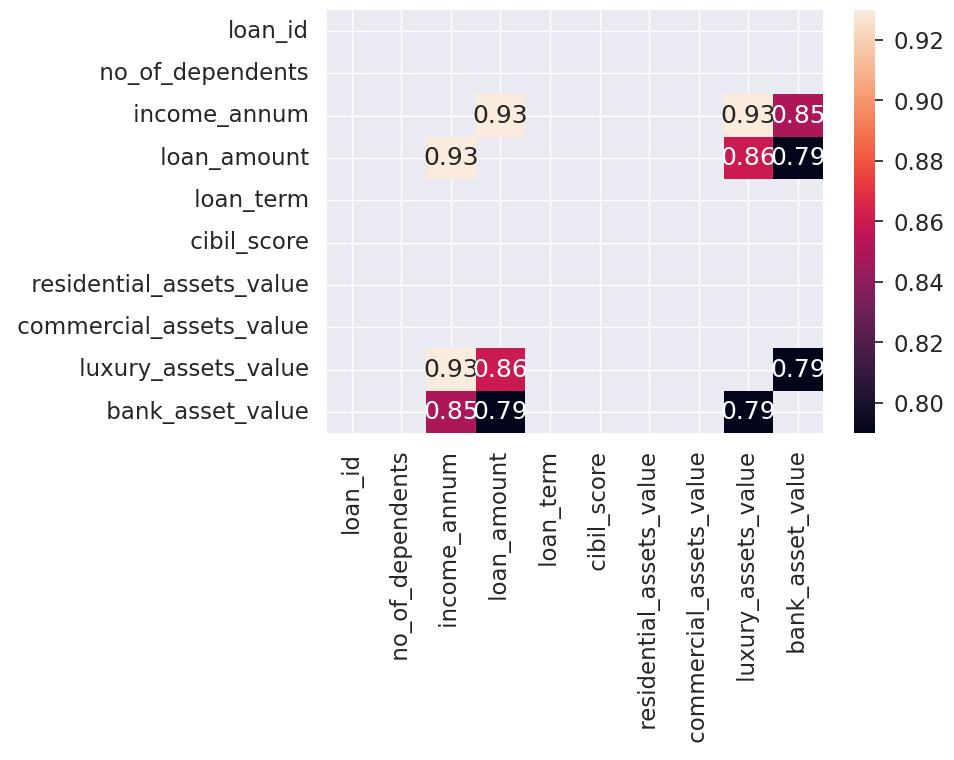

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url6 = "https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/Finalloan_approval_dataset.csv"
dfv = pd.read_csv(url6)

# Assuming dfv starts as a DataFrame of relevant columns
cor_h2o = dfv.corr(method='pearson').round(2)

# Filter the data to only include high correlations
cor_h2o_filtered = cor_h2o[(abs(cor_h2o) >= 0.7) & (cor_h2o != 1)]

# Plot the heatmap
sns.heatmap(cor_h2o_filtered, annot=True)
plt.show()


# **Which hyperparameters are important?**


all hyperparameters are important because they determined the way model works, however, there are some more important one, such as gamma,max depth, split datasets, learn_rate in GBM.

In [216]:
train, validate, test = np.split(
    dfv.sample(frac=1, random_state=42), [int(0.6 * len(dfv)), int(0.8 * len(dfv))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [217]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [218]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}


In [219]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator



In [220]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [221]:
print(train.columns)


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [222]:
M = train.names  # Get all column names
M.remove(' loan_status')  # Remove the 'loan_status' column from the list


In [223]:
z = ' loan_status'


In [224]:
gbm_grid2.train(x=M, y=z, training_frame=train, validation_frame=validate, ntrees=100, seed=1)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0443903
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.0454366
,0.6000000,0.1,4.0,1.0,gbm_grid2_model_22,0.0493599
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0494458
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.0499939
,0.5,0.1,4.0,0.8,gbm_grid2_model_33,0.0502373
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.0504647
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,0.0531858
,0.9,0.07,4.0,0.9,gbm_grid2_model_17,0.0547406
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0548933


In [225]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="rmse", decreasing=False)


In [226]:
gbm_gridperf2


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,rmse
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.1030069
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.1057843
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.1104878
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.1129020
,0.6000000,0.1,4.0,1.0,gbm_grid2_model_22,0.1133412
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,0.1133493
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.1139161
,0.5,0.1,4.0,0.8,gbm_grid2_model_33,0.1169820
,0.9,0.07,4.0,0.9,gbm_grid2_model_17,0.1173387
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,0.1183942


In [227]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)


Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [228]:
models = gbm_gridperf2.models

In [229]:
print(performance_metrics._metric_json.keys())


dict_keys(['__meta', 'model', 'model_checksum', 'frame', 'frame_checksum', 'description', 'model_category', 'scoring_time', 'predictions', 'MSE', 'RMSE', 'nobs', 'custom_metric_name', 'custom_metric_value', 'r2', 'logloss', 'AUC', 'pr_auc', 'Gini', 'mean_per_class_error', 'domain', 'cm', 'thresholds_and_metric_scores', 'max_criteria_and_metric_scores', 'gains_lift_table'])


In [230]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    predictions = model.predict(validate)  # Get predictions on the validation set
    residuals = predictions['predict'] - validate[z]  # Calculate residuals
    squared_residuals = (residuals ** 2).sum() / len(residuals)  # Calculate mean squared residuals
    list_residual_deviance.append(squared_residuals)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |████████████████████████

In [232]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [233]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [234]:
print(hyperparameters_dataframe)


    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.10          9          1.0                0.0
1               0.9        0.09          8          0.9                0.0
2               0.9        0.09          9          0.6                0.0
3               0.9        0.10          4          0.7                0.0
4               0.6        0.10          4          1.0                0.0
5               0.8        0.03          9          0.9                0.0
6               0.8        0.06          9          0.6                0.0
7               0.5        0.10          4          0.8                0.0
8               0.9        0.07          4          0.9                0.0
9               0.7        0.06          5          0.6                0.0
10              0.5        0.05          7          0.9                0.0
11              0.7        0.03          6          1.0                0.0
12              0.4      

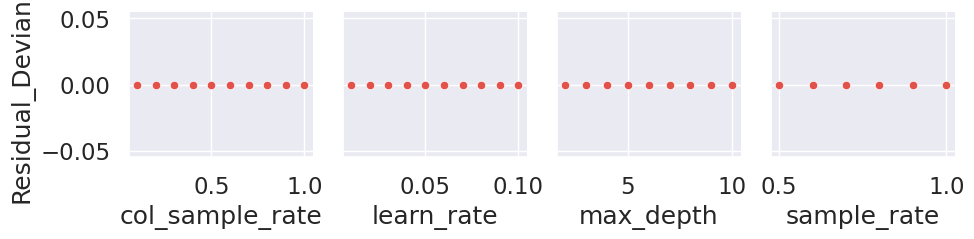

In [235]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

This is a summary of hyperparameter tuning for a Gradient Boosting Machine (GBM) model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.5, learn_rate of 0.1, max_depth of 9, and sample_rate of 1.0, with a Residual Deviance of 0.0. The next best models had Residual Deviances in the range of 0.044-0.12, while the worst-performing models had Residual Deviances above 0.16.

Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of a GBM model, and that hyperparameter tuning can lead to significant improvements in model performance.

**REFERENCES**

1. https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

2. https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

3. https://docs.h2o.ai/

4. http://net-informations.com/ds/mla/ols.html

5. https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

6. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

7. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

##SUMMARY

**Is the relationship significant?**
A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'self_employed' and 'residential_assets_value' were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

In the provided OLS regression results, it appears that some variables have p-values greater than 0.05, indicating that these variables are not statistically significant at the 95% confidence level. Here are some inferences based on this observation:

Interpretation of p-values: The p-value represents the probability of obtaining a result as extreme as the observed result under the null hypothesis. In the context of regression analysis, a low p-value (typically less than 0.05) suggests that the corresponding independent variable is statistically significant and has a meaningful impact on the dependent variable.

Variables with p-values > 0.05: For the provided dataset, several variables have p-values greater than 0.05, including 'education', 'self_employed', 'loan_id', 'no_of_dependents', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', and 'bank_asset_value'.

Multicollinearity: High p-values for some features could also be indicative of multicollinearity, where these features may be correlated with other features in the model. In such cases, even though individual features may not be statistically significant, their combined effect may still contribute to the overall predictive power of the model. And hence, before dropping them it is essential to check for further analysis. It's essential to investigate why these variables have higher p-values. It could be due to multicollinearity, where variables are highly correlated with each other, or it may indicate that these variables are not relevant to predicting the loan status. Further analysis, such as exploring correlations between variables or considering interactions between variables, may provide insights into improving the model's performance.


**Are any model assumptions violated?**
No, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.



**Is there any multicollinearity in the model?**
Yes, from the VIF data and from the heatmap and correlation matrix we can observe the existence of multicollinearity among the independent variables. Notably, the strongest correlations are observed between luxury_asset_value and income_annum, as well as between loan_amount and income_annum. If two variables are highly correlated, removing one of them might help in reducing multicollinearity. However, on further assessment we observe that all of these column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns



**In the multivariate models are predictor variables independent of all the other predictor variables?**
No, they are not all independent of each other, we can know that from the correlation heap map.
From the Correlation heat map  luxury_asset_value and income_annum are
positively correlated as well as  loan_amount and income_annum.
We can also observe bank_asset value being slighlty positively correlated with luxury_asset_value and income_annum; and income_annum with bank_asset_value

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
 The most significant predictor variable is cibil_score, followed by financial factors such as income_annum, loan_amount, and loan_term,etc. However, we observe that all the related column although directly related will be important in predicting the target variable and affect the model performance which is why we need to retain these columns

**Does the model make sense?**
Based on the above OLS regression, VIF values and GLM model results, the model appears to make sense and exhibits reasonable performance. Here's an analysis:

1. **R-squared (R^2)**:
   - OLS Regression: R-squared value of 0.614 indicates that approximately 61.4% of the variance in the dependent variable (loan_status_numeric) is explained by the independent variables in the model.
   - GLM Model: R-squared value of 0.446 on the training data and 0.453 on the validation data suggest that the model explains around 44.6% to 45.3% of the variance in the dependent variable.

2. **Significance of Coefficients**:
   - In both models, most coefficients appear to be statistically significant, as indicated by low p-values (p < 0.05), except for a few variables such as 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', and 'bank_asset_value' in the GLM model.
   
3. **Variance Inflation Factor (VIF)**:
   - VIF values for the independent variables in the GLM model are within acceptable ranges, indicating no significant multicollinearity issues. The highest VIF value is 74.40 for 'income_annum', suggesting a moderate level of multicollinearity but still within acceptable limits.

4. **RMSE**:
   - Root Mean Squared Error (RMSE) values are relatively low in both models, indicating that the models have good predictive accuracy.

5. **Other Considerations**:
   - The GLM model has been validated using both training and validation datasets, which helps assess its generalization performance.
   - Variable importance analysis suggests that 'cibil_score', 'loan_amount', and 'income_annum' are among the most important predictors in the GLM model, followed by 'loan_term' and 'no_of_dependents'.
   - Outliers, if present, may need to be addressed to improve model performance further.

Overall, while the models exhibit reasonable performance with R-squared values indicating a moderate level of explanatory power, there is room for improvement. Additional steps such as further feature engineering, outlier detection and removal, or trying different modeling techniques like ensemble methods could potentially enhance the model's accuracy.


**Does regularization help?**
MSE and RMSE: Before regularization, the model had a relatively high MSE of 0.1302 and RMSE of 0.3608 on the training data. After regularization, the MSE decreased drastically to 2.7119e-06, and the RMSE decreased to 0.0016. This indicates a significant improvement in model performance, with much smaller errors.
R^2 (Coefficient of Determination): Before regularization, the R^2 value of 0.4468 on the training data suggested that the model could explain about 44.68% of the variance in the response variable. After regularization, the R^2 approached 1 (0.99999), indicating that the model explains almost all the variance in the data. This indicates a much better fit to the data after regularization.
Effect of Regularization: Regularization helped to prevent overfitting by penalizing large coefficient values. This resulted in a simpler and more generalizable model, as evidenced by the significant improvement in performance metrics after regularization.
Regularization Technique: The regularization technique used was Ridge regression with a lambda value of 0.001. This effectively shrunk the coefficients towards zero, reducing model complexity and improving generalization performance.


**Which independent variables are significant?**
From above inferences and the heatmap we can conclude that the most significant variable is cibil_score, followed by financial factors such as income_annum, loan_amount, and loan_term


**Which hyperparameters are important?**
This is a summary of hyperparameter tuning for a Gradient Boosting Machine (GBM) model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.5, learn_rate of 0.1, max_depth of 9, and sample_rate of 1.0, with a Residual Deviance of 0.0. The next best models had Residual Deviances in the range of 0.044-0.12, while the worst-performing models had Residual Deviances above 0.16.

Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of a GBM model, and that hyperparameter tuning can lead to significant improvements in model performance.

## LICENSE

MIT License

Copyright (c) 2024 prarthanashetty29

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [237]:
import requests

url = 'https://raw.githubusercontent.com/prarthanashetty29/DataScienceEngineering/main/LICENSE'
license_text = requests.get(url).text
print(license_text)


MIT License

Copyright (c) 2024 prarthanashetty29

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN C